# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: 05.10.2020

Мягкий дедлайн: 01:59MSK 19.10.2020 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 01:59MSK 22.10.2020

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 10 + 2

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — стохастический, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и разобраться как подбирать гиперпараметры для этих методов.

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле  `utils.py`:

**Задание 1.1. (0.5 балла)** Полный градиентный спуск **GradientDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Задание 1.2. (1 балл)** Стохастический градиентный спуск **StochasticDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$ 

$\nabla_{w} q_{i_{k}}(w_{k}) \,$ - это оценка градиента по одному объекту, выбранному случайно.

**Задание 1.3. (1 балл)** Метод Momentum **MomentumDescent**:

$$
    h_0 = 0, \\
    h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

**Задание 1.4. (1 балл)** Метод Adaptive gradient algorithm **Adagrad**:

$$
    G_0 = 0, \\
    G_{k + 1} = G_{k} + \left(\nabla_{w} Q(w_{k})\right) ^ 2, \\
    w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\varepsilon + G_{k}}} \nabla_{w} Q(w_{k}).
$$


Во всех вышеназванных методах мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$
На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

Мы будем использовать функцию потерь MSE:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2
$$

Все вычисления должны быть векторизованы.

## Задание 2. Реализация линейной регресии (1.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `utils.py` - **LinearRegression**.

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы.
* Циклы средствами python допускаются только для итераций градиентного спуска.
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`.
    * Достижение максимального числа итераций `max_iter`.
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь для каждой итерации, начиная с нулевой (до первого шага).
* Инициализировать веса нужно нулевым вектором или из нормального $\mathcal{N}(0, 1)$ распределения (тогда нужно зафиксировать seed).

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from utils import Adagrad, GradientDescent, MomentumDescent, StochasticDescent, LinearRegression

In [3]:
num_objects = 100
dimension = 5

X = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

lambda_ = 1e-2
w0 = np.zeros(dimension)

max_iter = 10
tolerance = 0

In [4]:
# GradientDescent

descent = GradientDescent(lambda_=lambda_, w0=w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [5]:
# StochasticDescent

descent = StochasticDescent(lambda_=lambda_, w0=w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [6]:
# MomentumDescent

descent = MomentumDescent(lambda_=lambda_, w0=w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [7]:
# Adagrad

descent = Adagrad(lambda_=lambda_, w0=w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [8]:
# LinearRegression

# regression = LinearRegression(
#     descent = StochasticDescent(lambda_=lambda_, w0=w0, batch_size = 2),
#     tolerance = tolerance,
#     max_iter = max_iter
# )

# regression.fit(X, y)

# assert len(regression.loss_history) == max_iter, 'Loss history failed'

# prediction = regression.predict(X)

# assert prediction.shape[0] == num_objects, 'Predict failed'

Если ваше решение прошло все тесты локально, то теперь осталось протестировать его в Яндекс Контесте - **https://contest.yandex.ru/contest/19551**.

<div class="alert alert-block alert-info">
    <b>Почему LinearRegression assert закомментирован:</b><br>
Поскольку дальше я нахожу использование цикла неприличным, а использование <b>GridSearchCV</b> предполагает у класса <b>LinearRegression</b> наличие некоторых параметров, которые можно получить, если сделать LinearRegression наследником <b>BaseEstimator</b> и <b>RegressorMixin</b>, код, который я отправляла в контест довольно сильно отличается от того, что будет использован далее. К тому же, GridSearchCV после обхода сетки создает <b>best estimator</b>, который категорически отказывался создаваться, пока одним из аттрибутов линейной регрессии являлся спуск. Чтобы решить эту проблему я сделала следующее: экземпляр оптимизатора создается за пределами <b>init</b>, причем создается тот, который указан в инструкции (self.solver: str). Все параметры этого оптимизатора так же инициализируются в методе <b>fit</b>.
</div>

<div class="alert alert-block alert-info">
    Никнейм: <b>ainurmkh</b><br><br>
    <a href='https://contest.yandex.ru/contest/19551/run-report/36139890/'>GradientDescent</a><br>
    <a href='https://contest.yandex.ru/contest/19551/run-report/35811278/'>StochasticDescent</a><br>
    <a href='https://contest.yandex.ru/contest/19551/run-report/35811404/'>MomentumDescent</a><br>
    <a href='https://contest.yandex.ru/contest/19551/run-report/36209150/'>Adagrad</a><br>
    <a href='https://contest.yandex.ru/contest/19551/run-report/36426264/'>LinearRegression</a>
</div>

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.
Для дальнейшей работы сделайте следующее:
* Проведите разумную предобработку данных.
* Замените целевую переменную на её логарифм.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 3:1:1.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style="darkgrid")

plt.rcParams['figure.figsize'] = 8, 5   # размер графика
plt.rcParams['font.size'] = 12          # размер шрифта

In [10]:
df = pd.read_csv('/Users/ainurmukh/work/autos.csv')
df.head(1)

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen,postalCode,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,2001,6,2016-03-17 00:00:00,2016-03-17 17:40:17,91074,1500


In [11]:
# common
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247872 entries, 0 to 247871
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   brand                247872 non-null  object
 1   model                247872 non-null  object
 2   vehicleType          247872 non-null  object
 3   gearbox              247872 non-null  object
 4   fuelType             247872 non-null  object
 5   notRepairedDamage    247872 non-null  object
 6   powerPS              247872 non-null  int64 
 7   kilometer            247872 non-null  int64 
 8   yearOfRegistration   247872 non-null  int64 
 9   monthOfRegistration  247872 non-null  int64 
 10  dateCreated          247872 non-null  object
 11  lastSeen             247872 non-null  object
 12  postalCode           247872 non-null  int64 
 13  price                247872 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 26.5+ MB


- `brand`, `model`, `vehicleType` string.
- `gearbox` string, binary. Turn manuell and automatik to 0 and 1 respectively
- `fuelType` string.
- `notRepairedDamage` string. Values are nein/ja to 0/1
- `powerPS`, `kilometer` int.
- `yearOfRegistration`, `monthOfRegistration` int, categorical actually
- `dateCreated`, `lastSeen` dates.
- `postalCode` int. Categorical I guess. Gotta find out the meaning
- `price` int and the target

In [12]:
print('Unique values of \'gearbox\':', *df['gearbox'].unique())
print('Unique values of \'notRepairedDamage\':', *df['notRepairedDamage'].unique())
df['notRepairedDamage'] = df['notRepairedDamage'].map({'nein': 0, 'ja': 1})
df['gearbox'] = df['gearbox'].map({'manuell': 0, 'automatik': 1})

Unique values of 'gearbox': manuell automatik
Unique values of 'notRepairedDamage': nein ja


In [13]:
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [14]:
# common
# missing values
missing = pd.DataFrame(df.isnull().sum()).rename(columns={0: 'n_missing'})
missing['percentage'] = round(missing['n_missing'] * 100 / df.shape[0], 2)
missing = missing.sort_values(by='percentage', ascending=False)
print('Пропущенные значения:')
missing

Пропущенные значения:


,n_missing,percentage
brand,0,0.0
model,0,0.0
vehicleType,0,0.0
gearbox,0,0.0
fuelType,0,0.0
notRepairedDamage,0,0.0
powerPS,0,0.0
kilometer,0,0.0
yearOfRegistration,0,0.0
monthOfRegistration,0,0.0


In [15]:
# numerical
# quantile statistics
df.describe().drop('count', axis=0)

,gearbox,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,postalCode,price
mean,0.235202,0.099273,129.290186,123734.225729,2003.492750,6.222046,52133.032678,6787.990713
std,0.424126,0.299029,62.041806,39854.372670,6.407951,3.445869,25822.202496,8030.235988
min,0.000000,0.000000,1.000000,5000.000000,1910.000000,0.000000,1067.000000,1.000000
25%,0.000000,0.000000,86.000000,100000.000000,2000.000000,3.000000,31582.000000,1690.000000
50%,0.000000,0.000000,116.000000,150000.000000,2004.000000,6.000000,51465.000000,3999.000000
75%,0.000000,0.000000,158.000000,150000.000000,2008.000000,9.000000,73072.000000,8900.000000
max,1.000000,1.000000,999.000000,150000.000000,2016.000000,12.000000,99998.000000,99999.000000


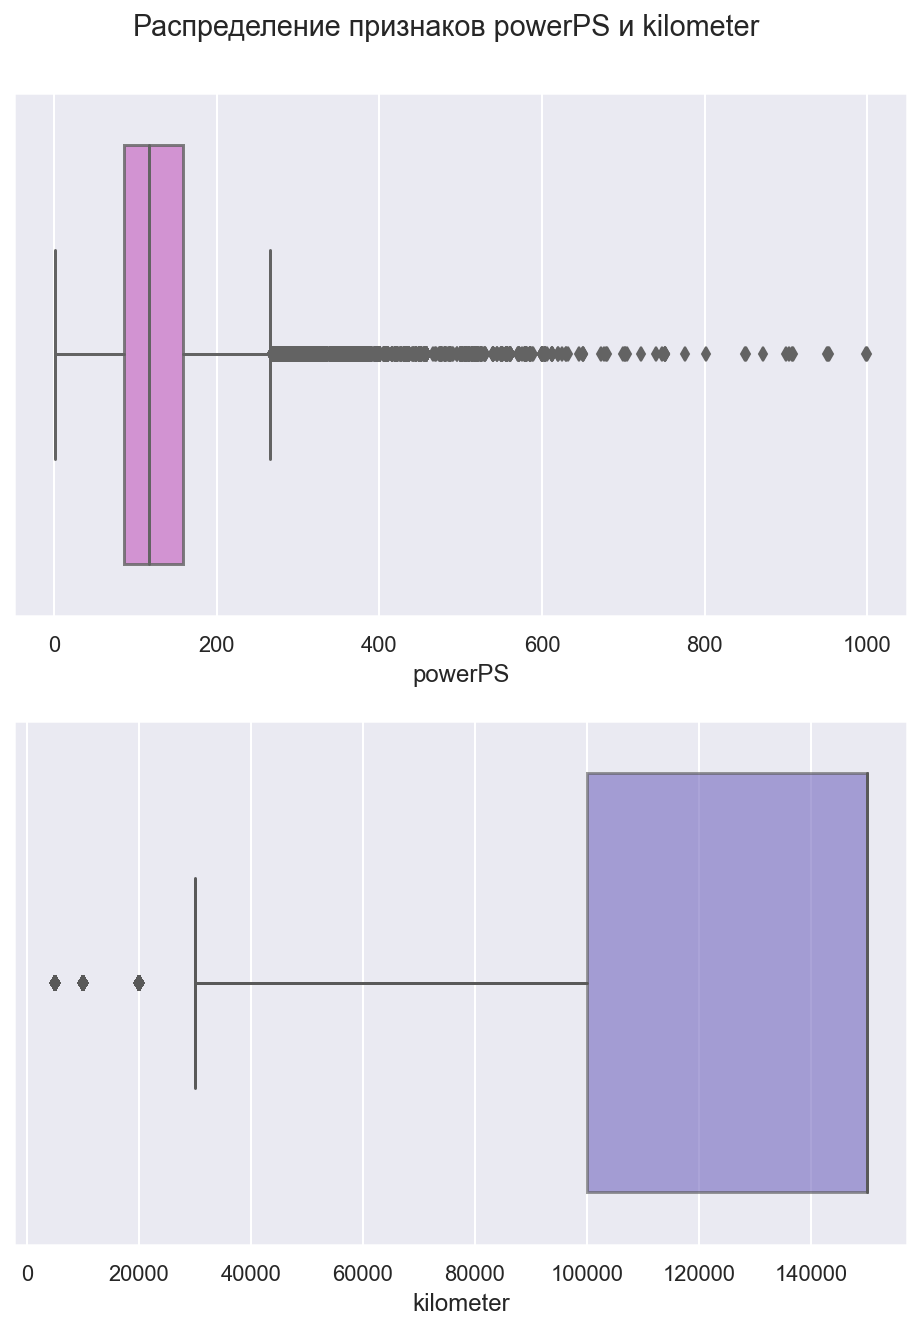

In [16]:
fig, (plt1, plt2) = plt.subplots(2, 1)
plt.subplots_adjust(top=0.925)
fig.set_size_inches(8, 10)
fig.suptitle('Распределение признаков powerPS и kilometer')
sns.boxplot(x=df['powerPS'], color='Orchid', ax=plt1, boxprops=dict(alpha=.8))
sns.boxplot(x=df['kilometer'], color='SlateBlue', ax=plt2, boxprops=dict(alpha=.6))
plt1.set_xlabel('powerPS', fontsize=12);
plt2.set_xlabel('kilometer', fontsize=12);

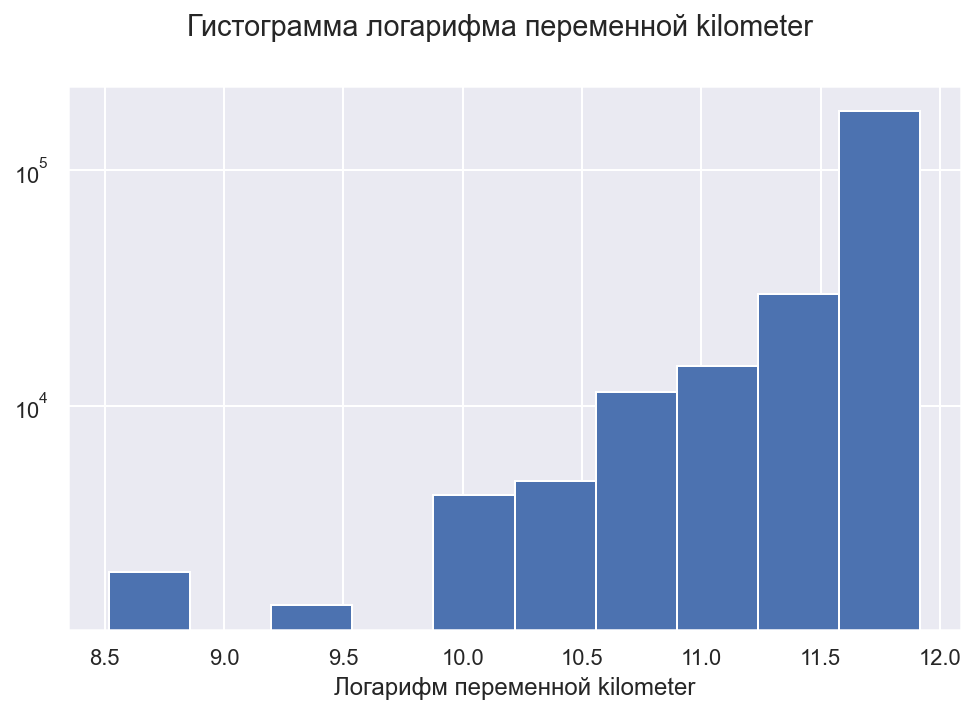

In [17]:
plt.hist(np.log1p(df['kilometer']), log=True)
plt.suptitle('Гистограмма логарифма переменной kilometer')
plt.xlabel('Логарифм переменной kilometer');

В Германии 13 месяцев в году


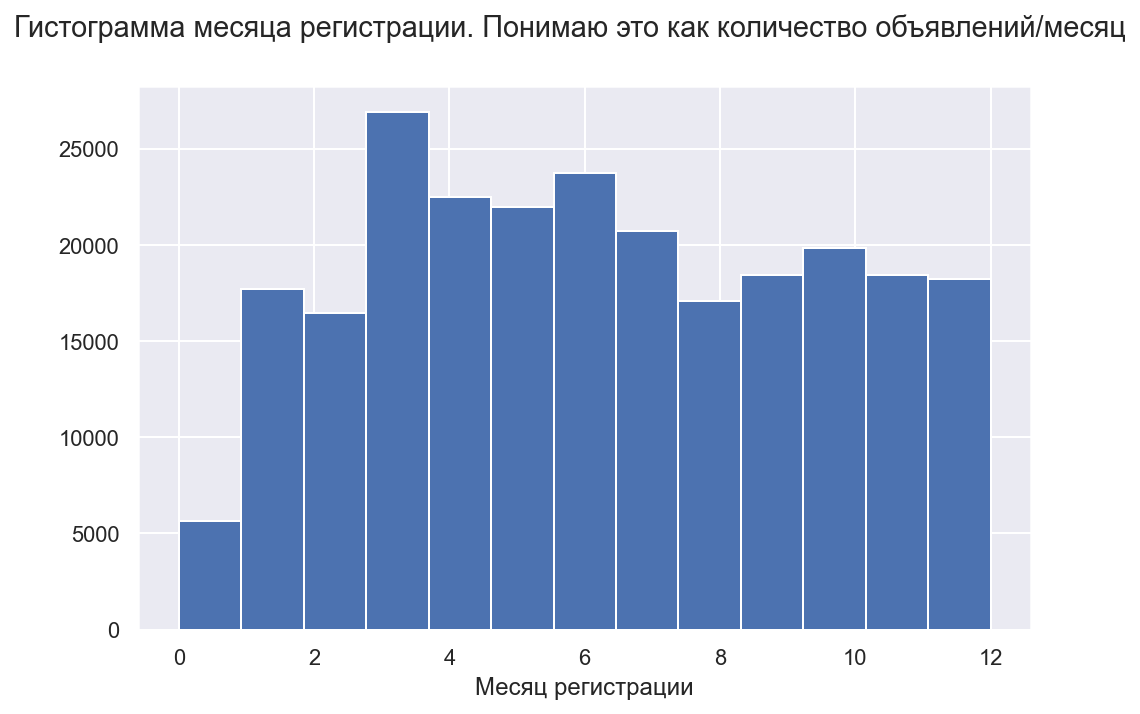

In [18]:
# вероятнее всего 0 это какое то неадекватное значение и надо это куда то убрать
# с другой стороны отсутствие месяца регистрации может говорить о чем-то
plt.hist(df['monthOfRegistration'], bins=13)
plt.suptitle('Гистограмма месяца регистрации. Понимаю это как количество объявлений/месяц')
plt.xlabel('Месяц регистрации');
print('В Германии', len(df['monthOfRegistration'].unique()), 'месяцев в году')

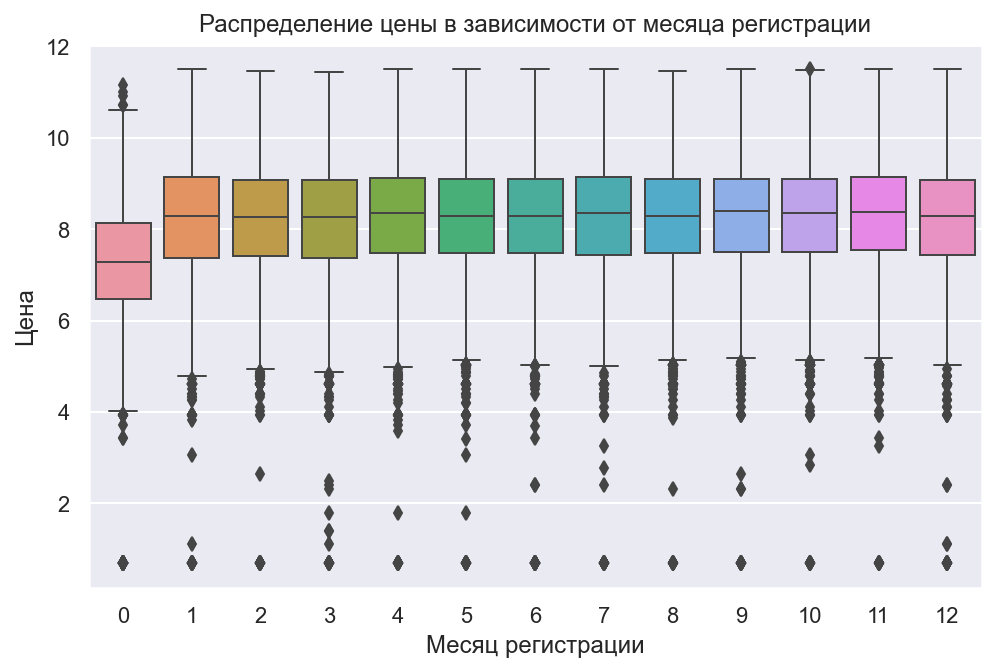

In [19]:
# я бы сделала признак есть месяц/нет месяца
sns.boxplot(x=df['monthOfRegistration'], y=np.log1p(df['price']), linewidth=1)
plt.title('Распределение цены в зависимости от месяца регистрации')
plt.xlabel('Месяц регистрации', fontsize=12)
plt.ylabel('Цена', fontsize=12);

In [20]:
df['monthOfRegistration'] = (df['monthOfRegistration'] == 0).astype(int)

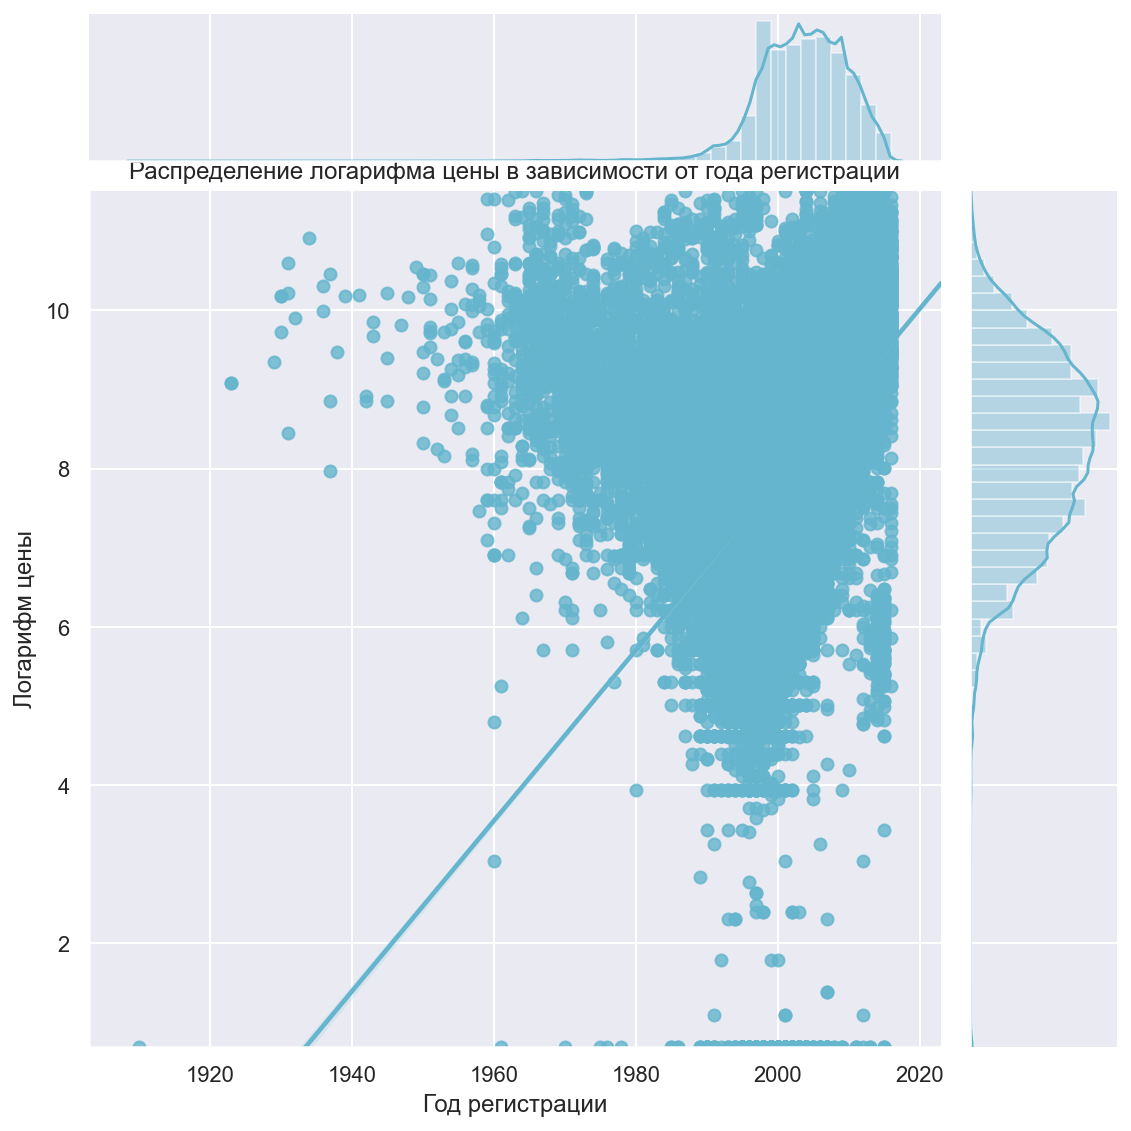

In [21]:
sns.jointplot(x=df['yearOfRegistration'], y=np.log1p(df['price']),
              ylim=(np.log1p(df['price']).min(), np.log1p(df['price']).max()),
              kind='reg', truncate=False, color='c', height=8)
plt.title('Распределение логарифма цены в зависимости от года регистрации')
plt.xlabel('Год регистрации', fontsize=12)
plt.ylabel('Логарифм цены', fontsize=12);

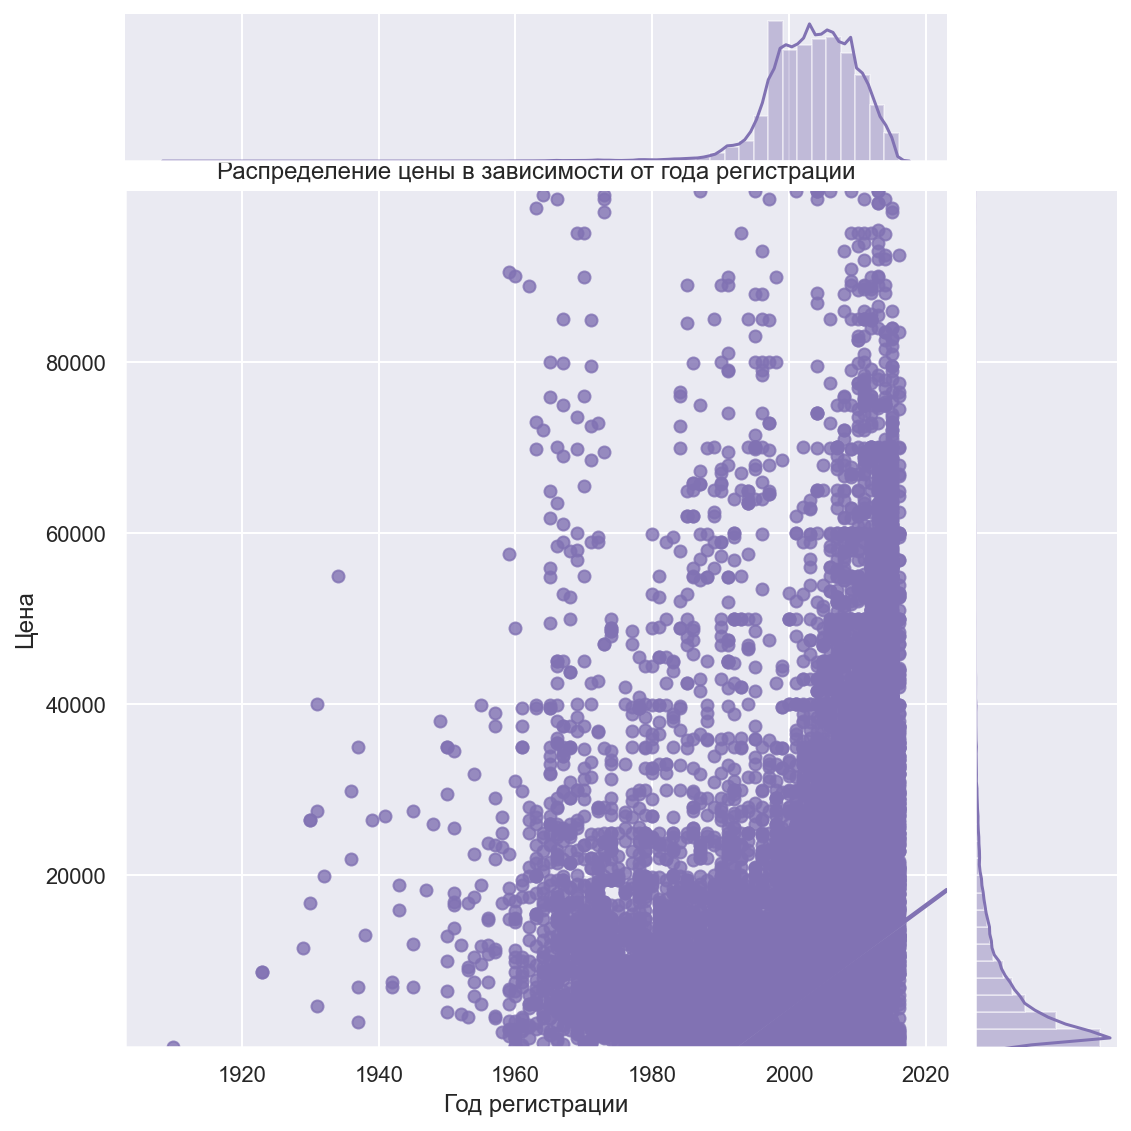

In [22]:
# мб на 20-летия разделить
sns.jointplot(x=df['yearOfRegistration'], y=df['price'],
              ylim=(df['price'].min(), df['price'].max()),
              kind='reg', truncate=False, color='m', height=8)
plt.title('Распределение цены в зависимости от года регистрации')
plt.xlabel('Год регистрации', fontsize=12)
plt.ylabel('Цена', fontsize=12);

In [23]:
print('Уникальных индексов:', len(df['postalCode'].unique()))
cnt = df['postalCode'].value_counts().reset_index().rename(columns={'index': 'code', 'postalCode': 'count'})
print('Среднее количество зарегистрированных по каждому индексу:', cnt['count'].mean())
print('Медиана:', cnt['count'].median())
cnt.head()

Уникальных индексов: 8070
Среднее количество зарегистрированных по каждому индексу: 30.715241635687732
Медиана: 19.0


,code,count
0,10115,796
1,65428,399
2,60311,248
3,38518,216
4,66333,209


<div class="alert alert-block alert-info">
<b>Вики:</b> Первая (крайняя левая) цифра в PLZ-коде обозначает зону (Zone) и, соответственно, аэропорт, через который происходит обмен почтой с этой зоной. При этом следует понимать, что зональное деление PLZ-кодов не соответствует административному делению Германии на земли.

Вторая цифра в PLZ-коде обозначает регион зоны и вместе с номером зоны образует двузначный номер региона, который определяет дальнейшую маршрутизацию почты внутри зоны.
</div>

In [24]:
# postalCode я дропну, потому что все что внутри зоны уже слишком мелко
# да, внутри каждой зоны есть бедные/богатые дома,
# нумерация там как то по часовой стрелке, можно отделить крутые районы, но лень
df['zonePLZ'] = df['postalCode'] // 1000
cnt = df['zonePLZ'].value_counts().reset_index().rename(columns={'index': 'zone', 'zonePLZ': 'count'})

print('Среднее количество зарегистрированных в каждой зоне:', cnt['count'].mean())
print('Медиана:', cnt['count'].median())
print('Уникальных зон:', len(df['zonePLZ'].unique()))
cnt.head()

df['zonePLZ'] = df['zonePLZ'].astype('object')
df = df.drop('postalCode', axis=1)

Среднее количество зарегистрированных в каждой зоне: 2609.178947368421
Медиана: 2628.0
Уникальных зон: 95


In [25]:
df['postMonth'] = df['dateCreated'].dt.month.astype('object')

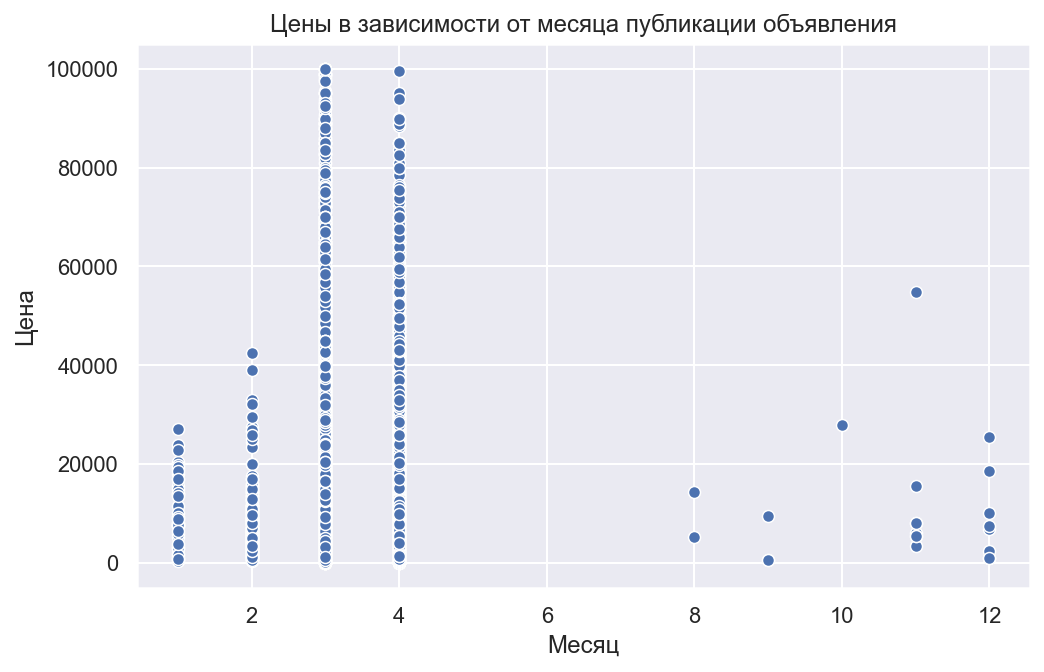

In [26]:
# продавцы в последний раз посещают сайт в марте и апреле, возможно в эти месяцы пик продаж
# df['lastSeen'].dt.month.unique() = [3, 4]

# месяц публикации
# видимо весной все продают
sns.scatterplot('postMonth', 'price', data=df)
plt.title('Цены в зависимости от месяца публикации объявления')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Цена', fontsize=12);

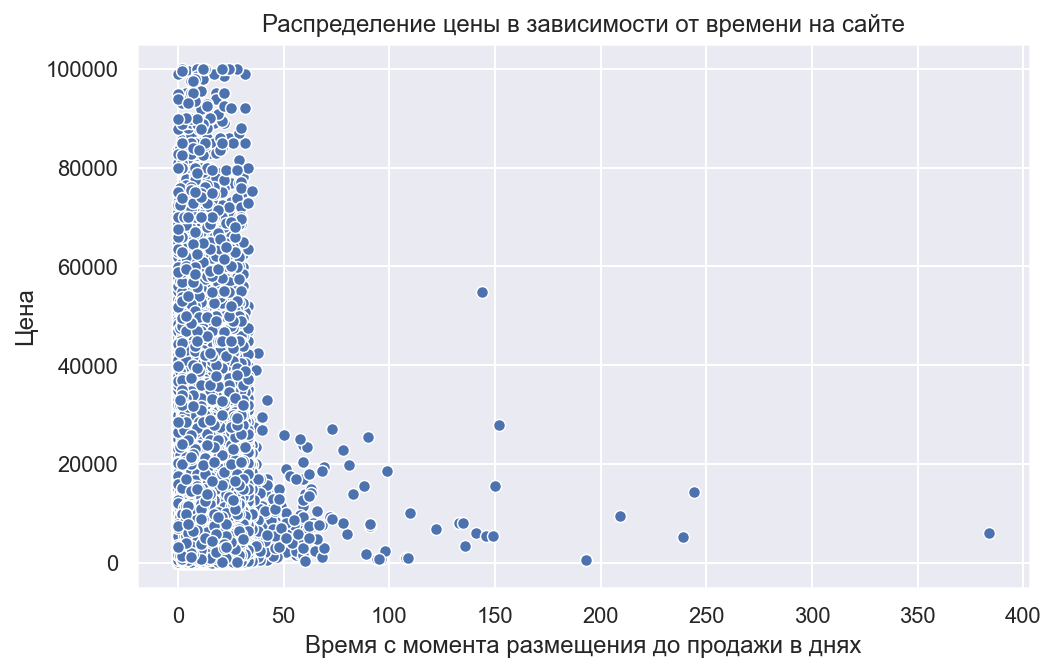

In [27]:
# как то бессмысленно
df['selling'] = (df['lastSeen'] - df['dateCreated']).dt.days
sns.scatterplot('selling', 'price', data=df)
plt.title('Распределение цены в зависимости от времени на сайте')
plt.xlabel('Время с момента размещения до продажи в днях', fontsize=12)
plt.ylabel('Цена', fontsize=12)
df = df.drop(['dateCreated', 'lastSeen'], axis=1);

In [28]:
from sklearn.model_selection import train_test_split

X, y = df.drop('price', axis=1), np.log1p(df['price'])
X['bias'] = pd.Series([1] * df.shape[0])  # bias

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=17)

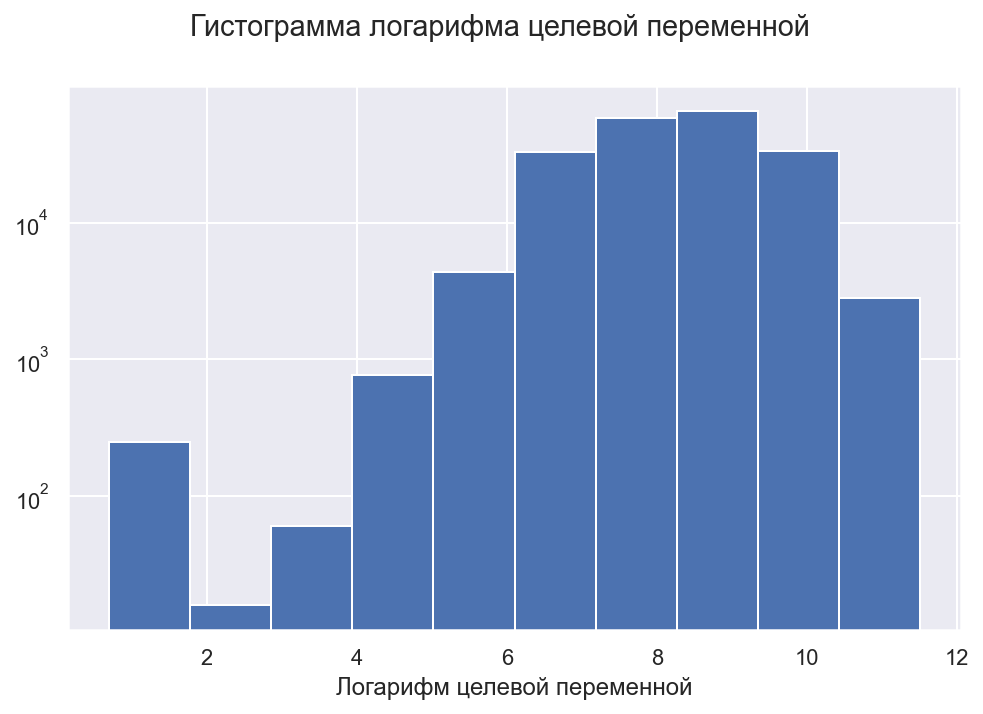

In [29]:
plt.hist(y_train, log=True)
plt.suptitle('Гистограмма логарифма целевой переменной')
plt.xlabel('Логарифм целевой переменной');

In [30]:
numeric = ['powerPS', 'kilometer', 'yearOfRegistration', 'selling']
categorical = X_train.dtypes[(X_train.dtypes == 'object')].index.tolist()

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

* **Задание 5.1. (1.5 балла)** Подберите по валидационной выборке наилучшую длину $\lambda$ шага для каждого метода. Для этого можно сделать перебор по логарифмической сетке, так как нас интересует скорее порядок величины, нежели её точное значение. Сравните качество методов по метрикам MSE и R^2 на обучающей и тестовой выборках, сравните количество итераций до сходимости. Все параметры кроме $\lambda$ стоит выставить равным значениям по умолчанию.

* **Задание 5.2. (0.5 балла)** Постройте график зависимости значения функции ошибки от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты. Сравните методы между собой.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

loss, result = {}, {}

In [32]:
for slvr in ['GradientDescent', 'StochasticDescent', 'MomentumDescent', 'Adagrad']:
    regression = LinearRegression(lambda_=lambda_, solver=slvr)
    pipeline = Pipeline(steps=[('ohe_scaling', column_transformer), ('regression', regression)])
    searcher = GridSearchCV(pipeline, {'regression__lambda_': np.logspace(-3, 0.5, 40)},
                            scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
    searcher.fit(X_train, y_train)

    y_pred = searcher.best_estimator_.predict(X_test)
    y_train_pred = searcher.best_estimator_.predict(X_train)

    loss[slvr] = searcher.best_estimator_['regression'].loss_history
    result[slvr] = [searcher.best_params_['regression__lambda_'],
                    mean_squared_error(y_test, y_pred),
                    mean_squared_error(y_train, y_train_pred),
                    r2_score(y_test, y_pred),
                    r2_score(y_train, y_train_pred)]

In [33]:
pd.DataFrame(result, index=['lambda', 'Test MSE', 'Train MSE', 'Test R2', 'Train R2'])

,GradientDescent,StochasticDescent,MomentumDescent,Adagrad
lambda,3.162278,0.142510,3.162278,2.571914
Test MSE,0.454225,36.426986,0.455531,0.392989
Train MSE,0.464222,36.447156,0.465475,0.405858
Test R2,0.665489,-25.826430,0.664527,0.710585
Train R2,0.661165,-25.602744,0.660250,0.703764


In [34]:
loss_history = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in loss.items()])).fillna(method='ffill')
loss_history = loss_history.reset_index().rename(columns={'index': 'Номер итерации'})
graph = pd.melt(loss_history, id_vars='Номер итерации', var_name='Оптимизатор', value_name='Логарифм функции ошибки')
graph['Логарифм функции ошибки'] = np.log1p(graph['Логарифм функции ошибки'])

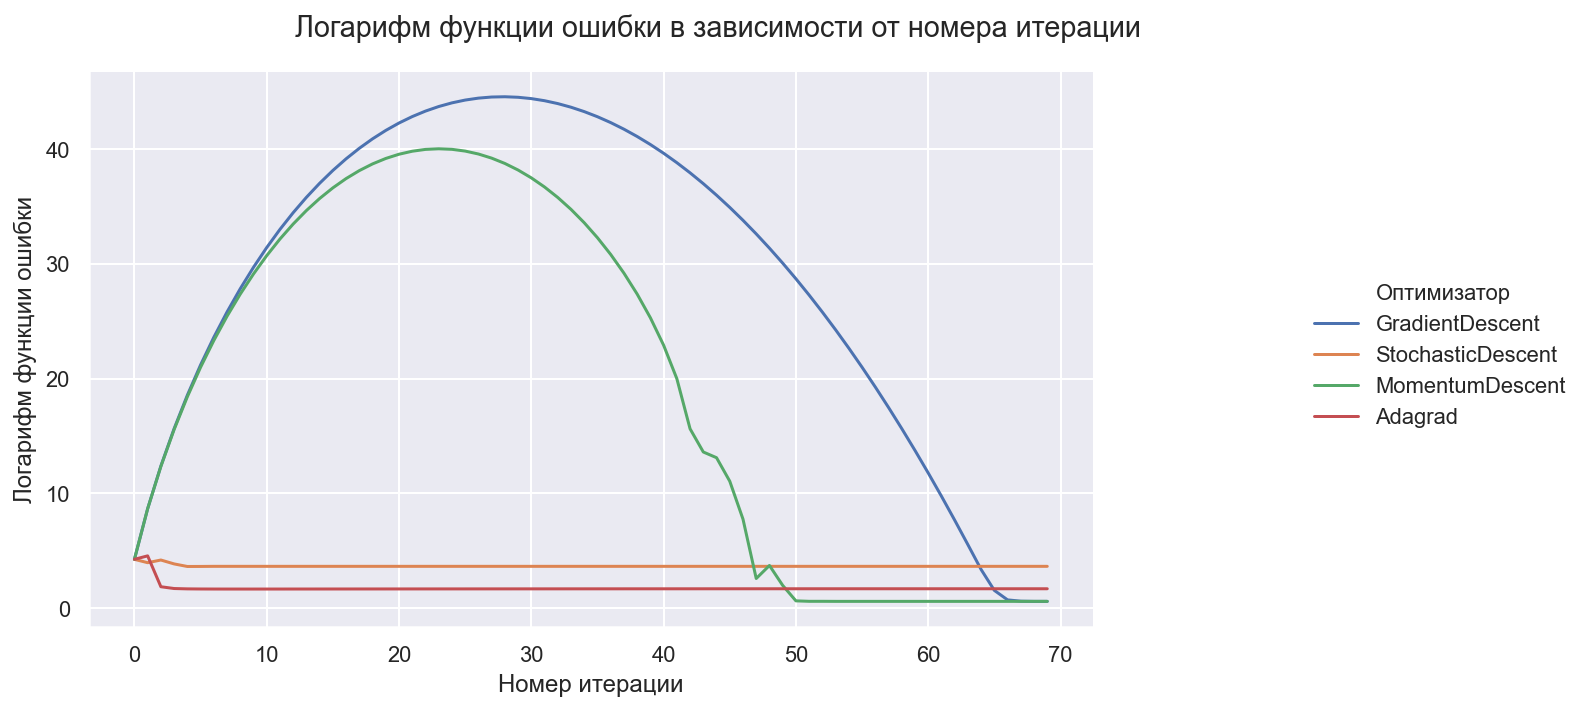

In [35]:
fig = sns.relplot(x='Номер итерации', y='Логарифм функции ошибки', hue='Оптимизатор', data=graph, kind='line')
plt.subplots_adjust(top=0.9)
fig.fig.set_size_inches(12, 5)
fig.fig.suptitle('Логарифм функции ошибки в зависимости от номера итерации');

In [36]:
print('Количество шагов до сходимости метода импульса:', len(loss['MomentumDescent']))
print('Количество шагов до сходимости стохастического спуска:', len(loss['StochasticDescent']))
print('Количество шагов до сходимости Adagrad:', len(loss['Adagrad']))

Количество шагов до сходимости метода импульса: 54
Количество шагов до сходимости стохастического спуска: 7
Количество шагов до сходимости Adagrad: 50


<div class="alert alert-block alert-info">
Участок, где кривая становится горизонтальной прямой – момент остановки цикла. Чтобы засунуть все в один график, я сделала DataFrame, который сделал длины loss_history одинаковыми (пропуски заполнила последним значением). Adagrad и Stochastic, вероятно, не уходят слишком мимо, но и до конца не доходят. Momentum сначала все-таки уходит куда-то не туда (пока импульс не накопится), затем сходится раньше, чем ванильный градиентный спуск. 
</div>

## Задание 6. Сходимость стохастического градиентного спуска в зависимости от размера батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из списка. Замерьте время и количество итераций до сходимости. Посчитайте среднее и дисперсию этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [37]:
from collections import defaultdict
from time import time

In [38]:
k = 15
sgd = defaultdict(list)
for batch_size in np.arange(5, 500, 10):
    sgd['batch_size'].append(batch_size)
    for i in range(k):
        regression = LinearRegression(lambda_=result['StochasticDescent'][0], solver='StochasticDescent')
        pipeline = Pipeline(steps=[('ohe_scaling', column_transformer), ('regression', regression)])
        model = Pipeline(steps=[('ohe_scaling', column_transformer), ('regression', regression)])
        
        start = time()
        model.fit(X_train, y_train)
        end = time()
        
        sgd[f'time_{i + 1}'].append(end - start)
        sgd[f'iterations_{i + 1}'].append(len(model['regression'].loss_history))

In [39]:
sgd = pd.DataFrame(sgd)
sgd['mean_time'] = sgd[[f'time_{i + 1}' for i in range(k)]].mean(axis=1)
sgd['mean_iter'] = sgd[[f'iterations_{i + 1}' for i in range(k)]].mean(axis=1)
sgd['var_time'] = sgd[[f'time_{i + 1}' for i in range(k)]].var(axis=1)
sgd['var_iter'] = sgd[[f'iterations_{i + 1}' for i in range(k)]].var(axis=1)
sgd.head(2)

,batch_size,time_1,iterations_1,time_2,iterations_2,time_3,iterations_3,time_4,iterations_4,time_5,...,time_13,iterations_13,time_14,iterations_14,time_15,iterations_15,mean_time,mean_iter,var_time,var_iter
0,5,0.395365,5,0.519882,41,0.446723,31,0.402508,22,0.425118,...,0.458850,43,0.398213,21,0.379508,10,0.412862,19.4,0.001636,159.400000
1,15,0.361547,6,0.381847,9,0.424086,23,0.421434,23,0.425101,...,0.499495,57,0.430388,33,0.422975,31,0.424588,28.4,0.001414,223.971429


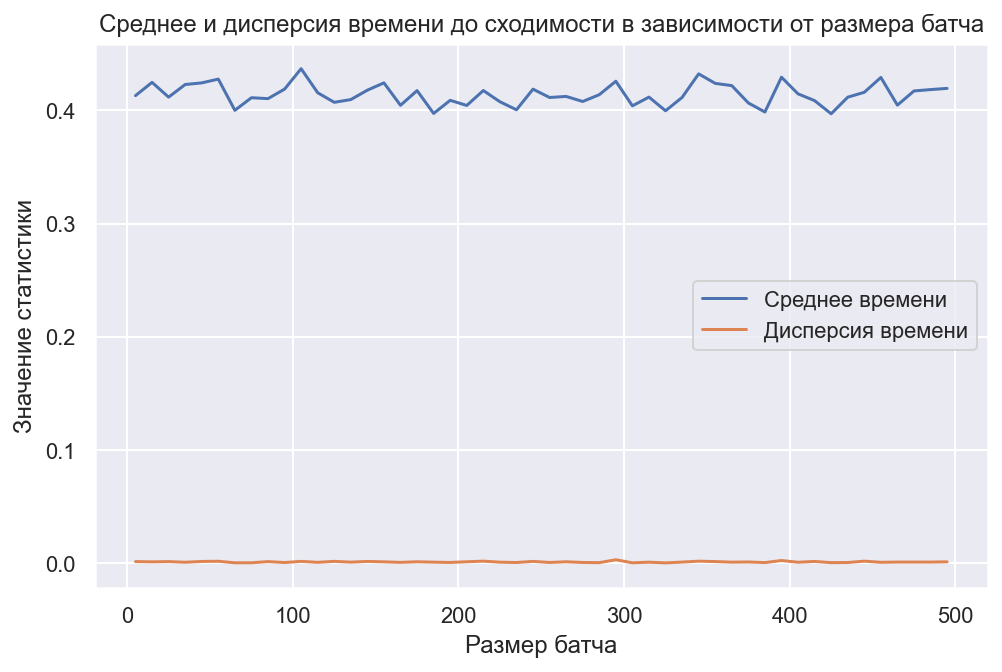

In [40]:
plt.plot(sgd['batch_size'], sgd['mean_time'], label='Среднее времени')
plt.plot(sgd['batch_size'], sgd['var_time'], label='Дисперсия времени')
plt.xlabel('Размер батча')
plt.ylabel('Значение статистики')
plt.title('Среднее и дисперсия времени до сходимости в зависимости от размера батча')
plt.legend();

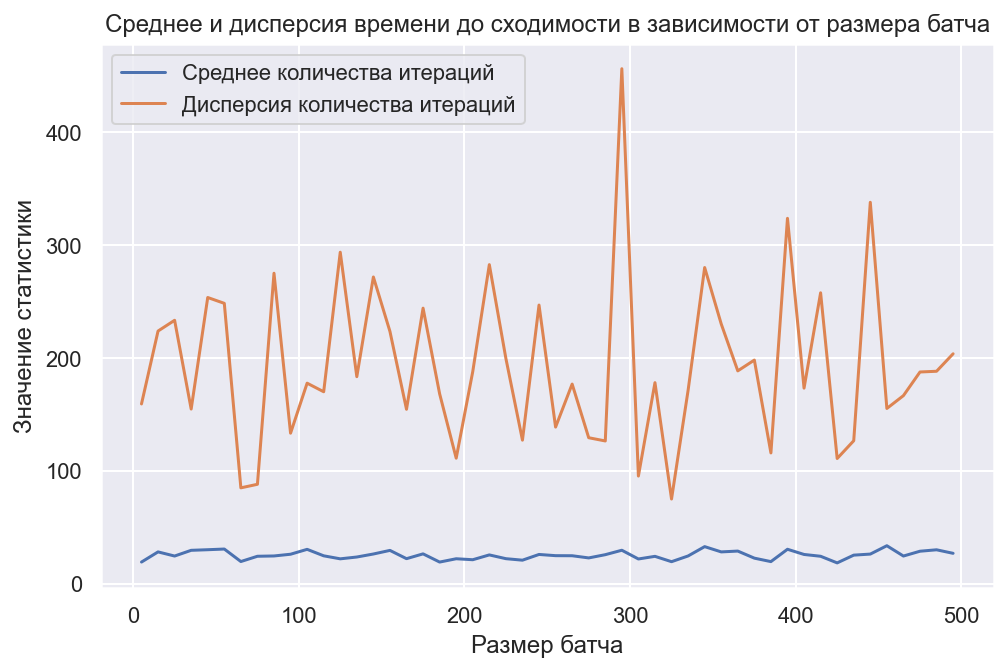

In [41]:
plt.plot(sgd['batch_size'], sgd['mean_iter'], label='Среднее количества итераций')
plt.plot(sgd['batch_size'], sgd['var_iter'], label='Дисперсия количества итераций')
plt.xlabel('Размер батча')
plt.ylabel('Значение статистики')
plt.title('Среднее и дисперсия времени до сходимости в зависимости от размера батча')
plt.legend();

In [42]:
iterations = pd.melt(sgd[['batch_size'] + [f'iterations_{i + 1}' for i in range(k)]],
                     id_vars='batch_size', var_name='k', value_name='iterations')
time = pd.melt(sgd[['batch_size'] + [f'time_{i + 1}' for i in range(k)]],
               id_vars='batch_size', var_name='k', value_name='time')

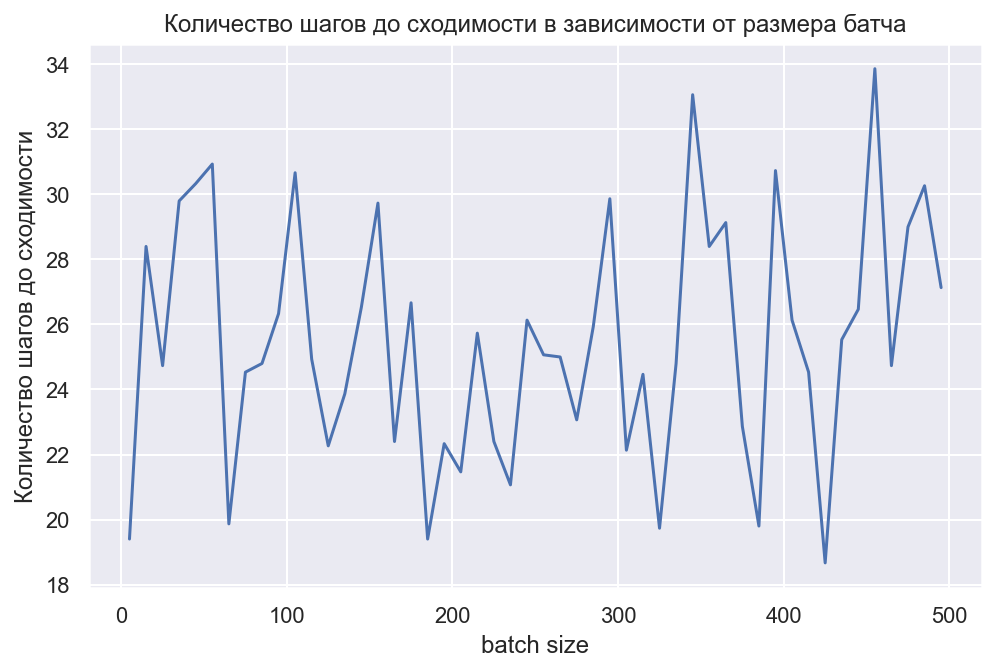

In [43]:
plt.plot(iterations.groupby('batch_size')['iterations'].mean())
plt.title('Количество шагов до сходимости в зависимости от размера батча')
plt.xlabel('batch size')
plt.ylabel('Количество шагов до сходимости');

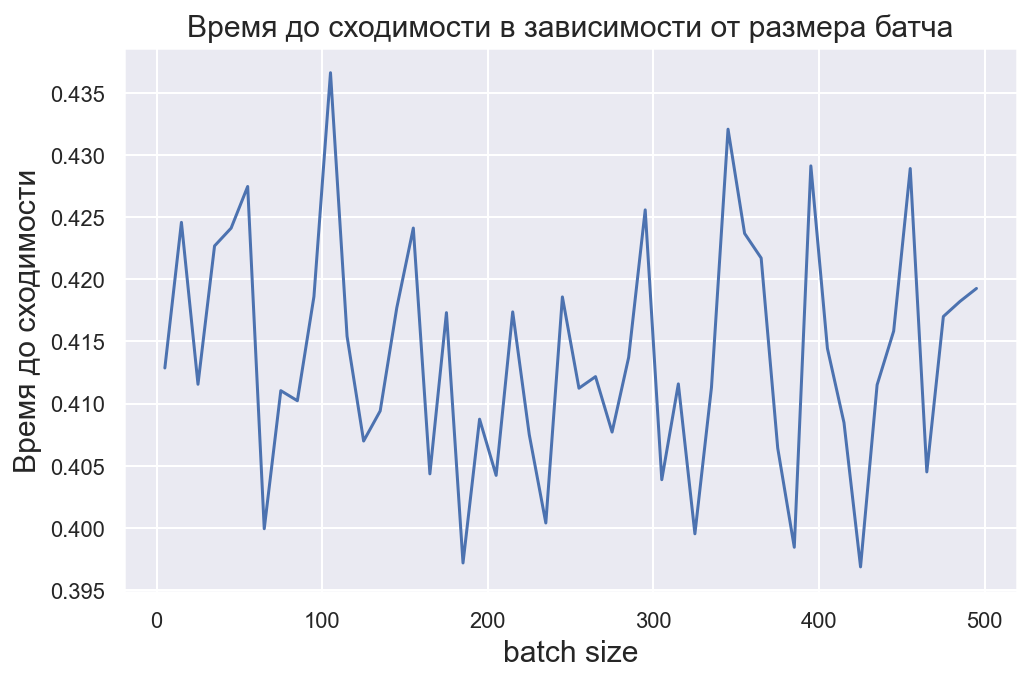

In [44]:
plt.plot(time.groupby('batch_size')['time'].mean())
plt.title('Время до сходимости в зависимости от размера батча', fontsize=15)
plt.xlabel('batch size', fontsize=15)
plt.ylabel('Время до сходимости', fontsize=15);

In [45]:
print(f'500 объектов составляют {round(500 * 100 / X.shape[0], 2)}% от всей обучающей выборки')

500 объектов составляют 0.2% от всей обучающей выборки


<div class="alert alert-block alert-info">
Поскольку максимальный размер батча составляет 0.2% от выборки, различия незаметны, колебания выглядят случайными.
    
Полагаю, с возрастанием размера батча время вычисления значения градиента должно возрастать, при этом количество итераций до сходимости должно уменьшаться.
</div>

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. (Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов). Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{1}{2} \| w \|^2
$$

Допишите классы **GradientDescentReg**, **StochasticDescentReg**, **MomentumDescentReg**, **AdagradReg** в файле `utils.py`. Мы будем использовать тот же самый класс для линейной регрессии, так как для сравнения методов с регуляризацией и без неё нам нужна только MSE часть функции потерь.

Найдите по валидационной выборке лучшие параметры обучения с регуляризацией. Сравните для каждого метода результаты на тестовой выборке по метрикам MSE и R^2 с регуляризацией и без регуляризации. Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации.

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Чем вы можете объяснить это?

In [46]:
%autoreload 2

from utils import LinearRegression

In [47]:
r_result = {}
for slvr in ['GradientDescent', 'StochasticDescent', 'MomentumDescent', 'Adagrad']:
    regression = LinearRegression(lambda_=lambda_, solver=slvr + 'Reg')
    pipeline = Pipeline(steps=[('ohe_scaling', column_transformer), ('regression', regression)])
    searcher = GridSearchCV(pipeline,
                            {'regression__lambda_': np.logspace(-3, 0.5, 10),
                             'regression__mu': np.logspace(-2, 0.5, 20)},
                            scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    searcher.fit(X_train, y_train)

    y_pred = searcher.best_estimator_.predict(X_test)
    y_train_pred = searcher.best_estimator_.predict(X_train)

    loss[slvr + 'Reg'] = searcher.best_estimator_['regression'].loss_history
    r_result[slvr] = [searcher.best_params_['regression__lambda_'],
                      searcher.best_params_['regression__mu'],
                      mean_squared_error(y_test, y_pred),
                      mean_squared_error(y_train, y_train_pred),
                      r2_score(y_test, y_pred),
                      r2_score(y_train, y_train_pred)]

In [48]:
pd.DataFrame(r_result, index=['lambda', 'mu', 'Test MSE', 'Train MSE', 'Test R2', 'Train R2'])

,GradientDescent,StochasticDescent,MomentumDescent,Adagrad
lambda,3.162278,0.527500,3.162278,3.162278
mu,0.010000,0.206914,0.010000,0.010000
Test MSE,0.475445,1.765541,0.476176,0.525512
Train MSE,0.484505,1.791703,0.485204,0.536016
Test R2,0.649861,-0.300222,0.649323,0.612990
Train R2,0.646360,-0.307762,0.645850,0.608763


In [49]:
loss_history = dict([(k, pd.Series(v)) for k, v in loss.items() if k in ('GradientDescentReg', 'GradientDescent')])
loss_history = pd.DataFrame(loss_history).reset_index().rename(columns={'index': 'Номер итерации'})
graph = pd.melt(loss_history, id_vars='Номер итерации', var_name='Оптимизатор', value_name='Функция ошибки')
graph['Логарифм функции ошибки'] = np.log1p(graph['Функция ошибки'])
print('Количество шагов до сходимости без регуляризации:', len(loss['GradientDescent']))
print('Количество шагов до сходимости c регуляризацией:', len(loss['GradientDescentReg']))

Количество шагов до сходимости без регуляризации: 70
Количество шагов до сходимости c регуляризацией: 70


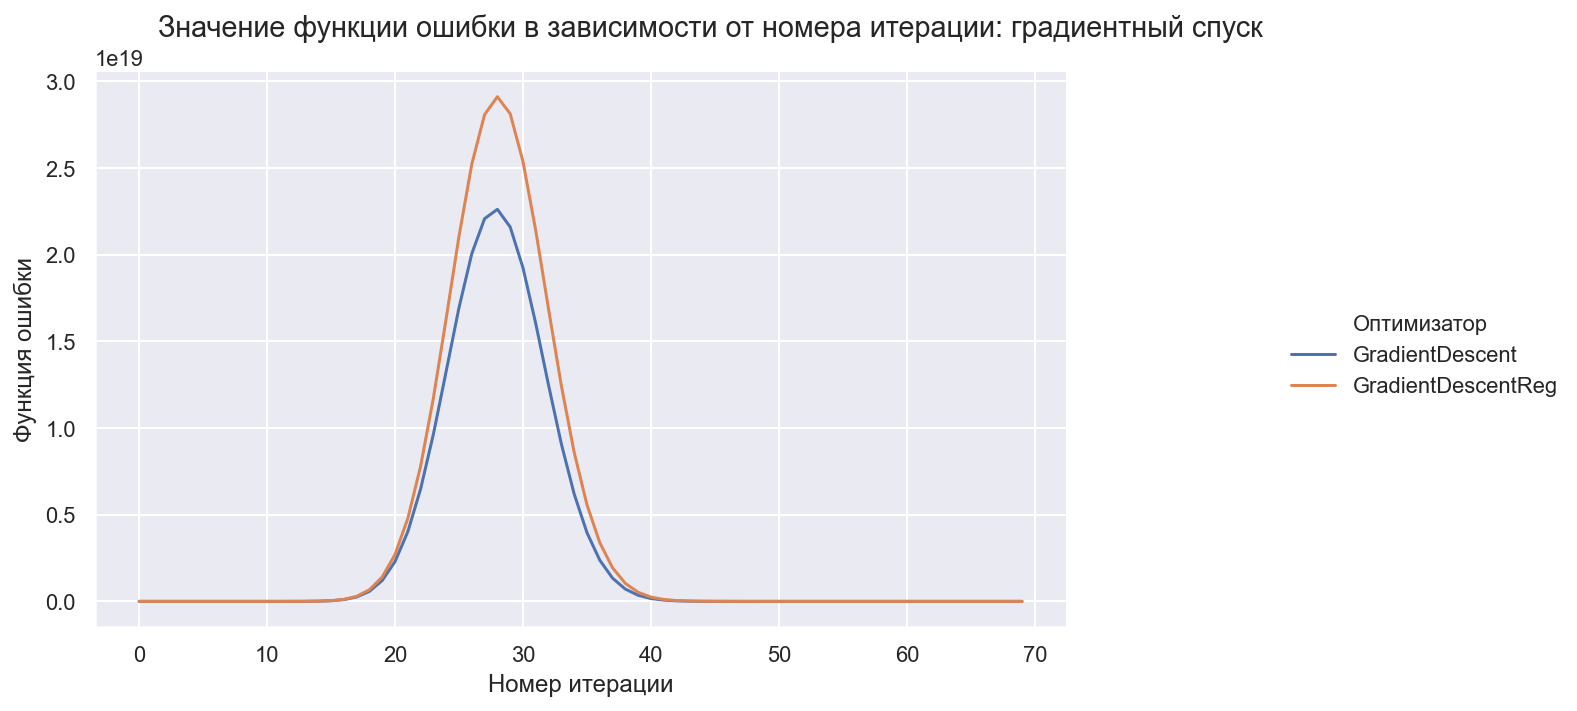

In [50]:
fig = sns.relplot(x='Номер итерации', y='Функция ошибки', hue='Оптимизатор',
                  data=graph, kind='line', legend='full')
plt.subplots_adjust(top=0.9)
fig.fig.set_size_inches(12, 5)
fig.fig.suptitle('Значение функции ошибки в зависимости от номера итерации: градиентный спуск');

In [51]:
loss_history = dict([(k, pd.Series(v)) for k, v in loss.items() if k in ('StochasticDescentReg', 'StochasticDescent')])
loss_history = pd.DataFrame(loss_history).reset_index().rename(columns={'index': 'Номер итерации'})
graph = pd.melt(loss_history, id_vars='Номер итерации', var_name='Оптимизатор', value_name='Функция ошибки')
graph['Логарифм функции ошибки'] = np.log1p(graph['Функция ошибки'])
print('Количество шагов до сходимости без регуляризации:', len(loss['StochasticDescent']))
print('Количество шагов до сходимости c регуляризацией:', len(loss['StochasticDescentReg']))

Количество шагов до сходимости без регуляризации: 7
Количество шагов до сходимости c регуляризацией: 436


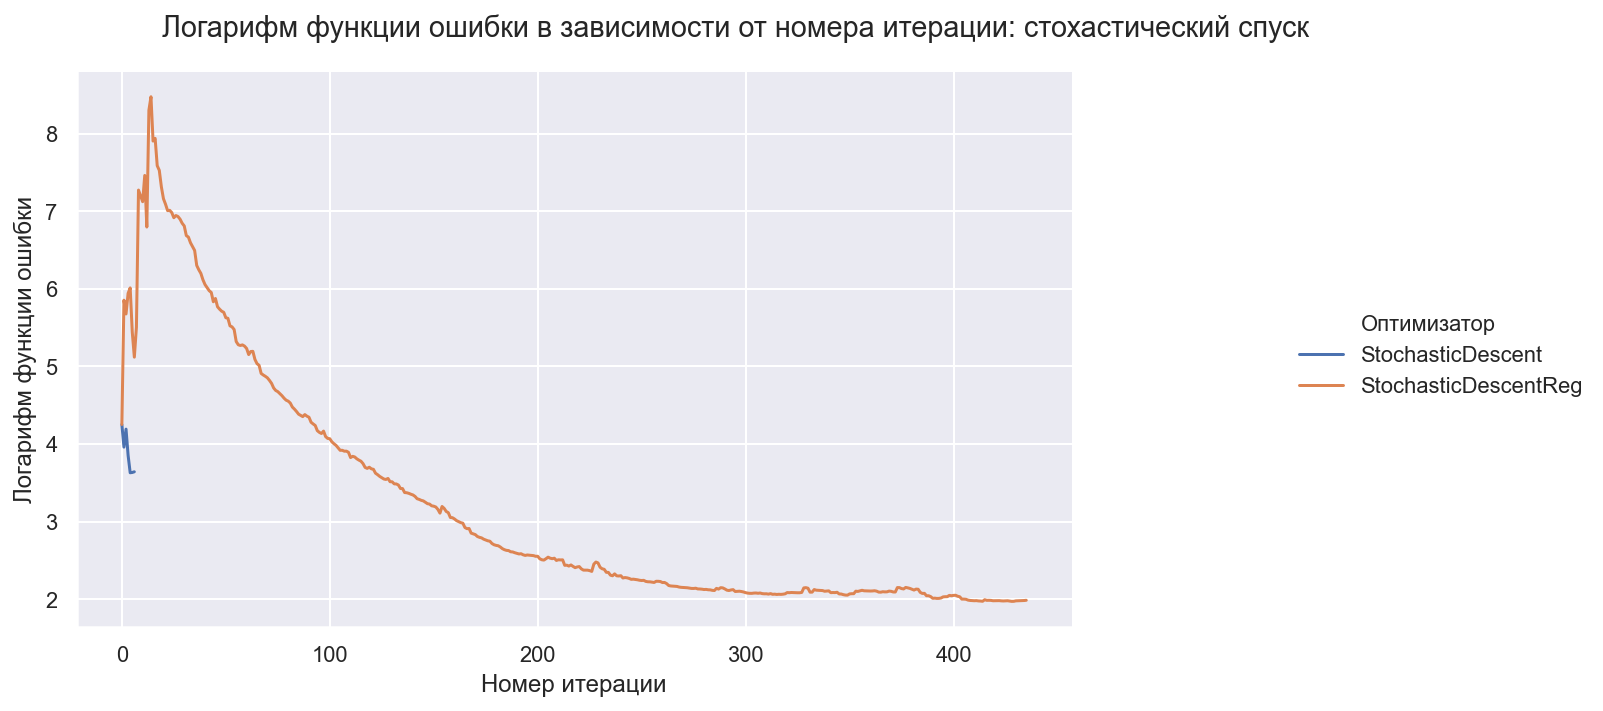

In [52]:
fig = sns.relplot(x='Номер итерации', y='Логарифм функции ошибки', hue='Оптимизатор',
                  data=graph, kind='line', legend='full')
plt.subplots_adjust(top=0.9)
fig.fig.set_size_inches(12, 5)
fig.fig.suptitle('Логарифм функции ошибки в зависимости от номера итерации: стохастический спуск');

In [53]:
loss_history = dict([(k, pd.Series(v)) for k, v in loss.items() if k in ('MomentumDescentReg', 'MomentumDescent')])
loss_history = pd.DataFrame(loss_history).reset_index().rename(columns={'index': 'Номер итерации'})
graph = pd.melt(loss_history, id_vars='Номер итерации', var_name='Оптимизатор', value_name='Функция ошибки')
print('Количество шагов до сходимости без регуляризации:', len(loss['MomentumDescent']))
print('Количество шагов до сходимости c регуляризацией:', len(loss['MomentumDescentReg']))

Количество шагов до сходимости без регуляризации: 54
Количество шагов до сходимости c регуляризацией: 54


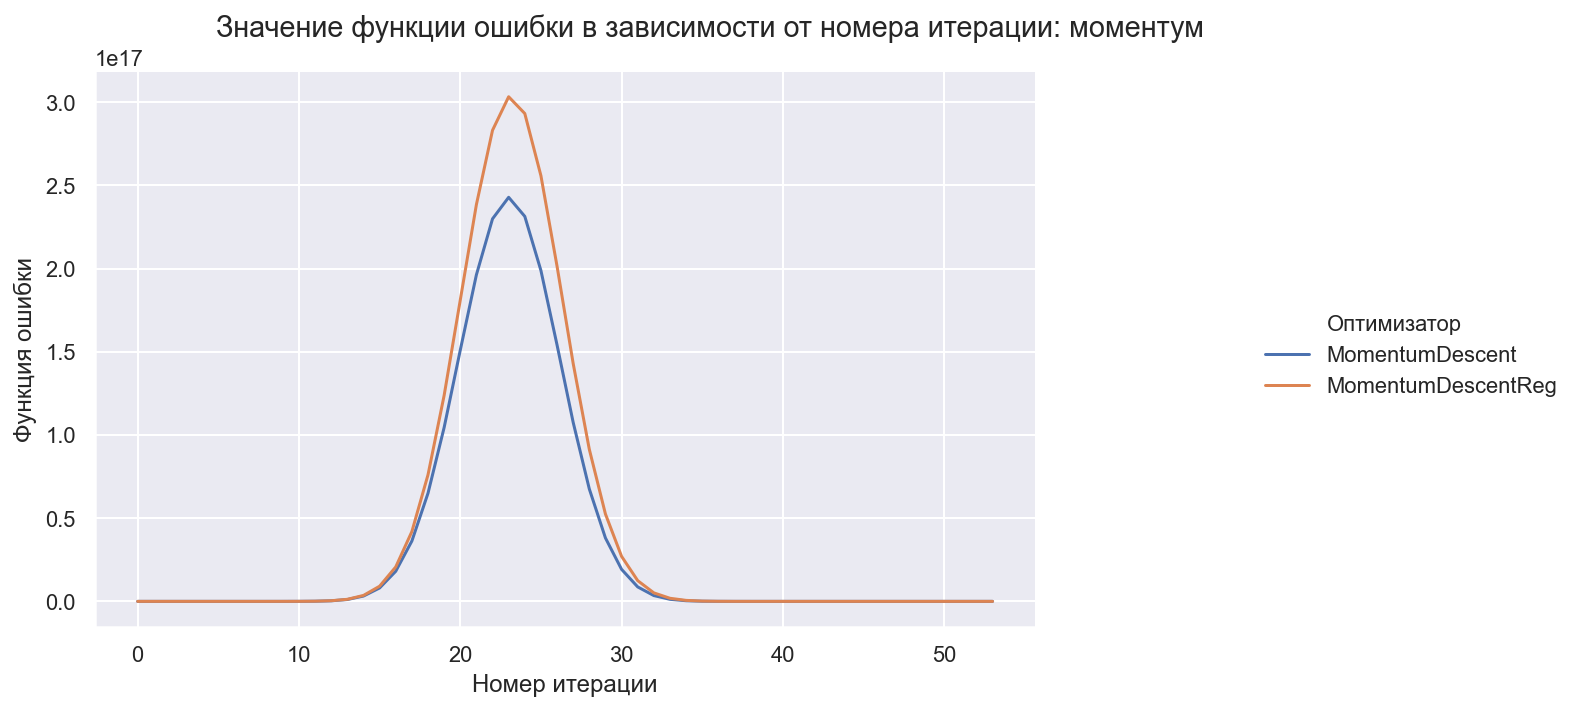

In [54]:
fig = sns.relplot(x='Номер итерации', y='Функция ошибки', hue='Оптимизатор',
                  data=graph, kind='line', legend='full')
plt.subplots_adjust(top=0.9)
fig.fig.set_size_inches(12, 5)
fig.fig.suptitle('Значение функции ошибки в зависимости от номера итерации: моментум');

In [55]:
loss_history = dict([(k, pd.Series(v)) for k, v in loss.items() if k in ('AdagradReg', 'Adagrad')])
loss_history = pd.DataFrame(loss_history).reset_index().rename(columns={'index': 'Номер итерации'})
graph = pd.melt(loss_history, id_vars='Номер итерации', var_name='Оптимизатор', value_name='Функция ошибки')
graph['Логарифм функции ошибки'] = np.log1p(graph['Функция ошибки'])
print('Количество шагов до сходимости без регуляризации:', len(loss['Adagrad']))
print('Количество шагов до сходимости c регуляризацией:', len(loss['AdagradReg']))

Количество шагов до сходимости без регуляризации: 50
Количество шагов до сходимости c регуляризацией: 99


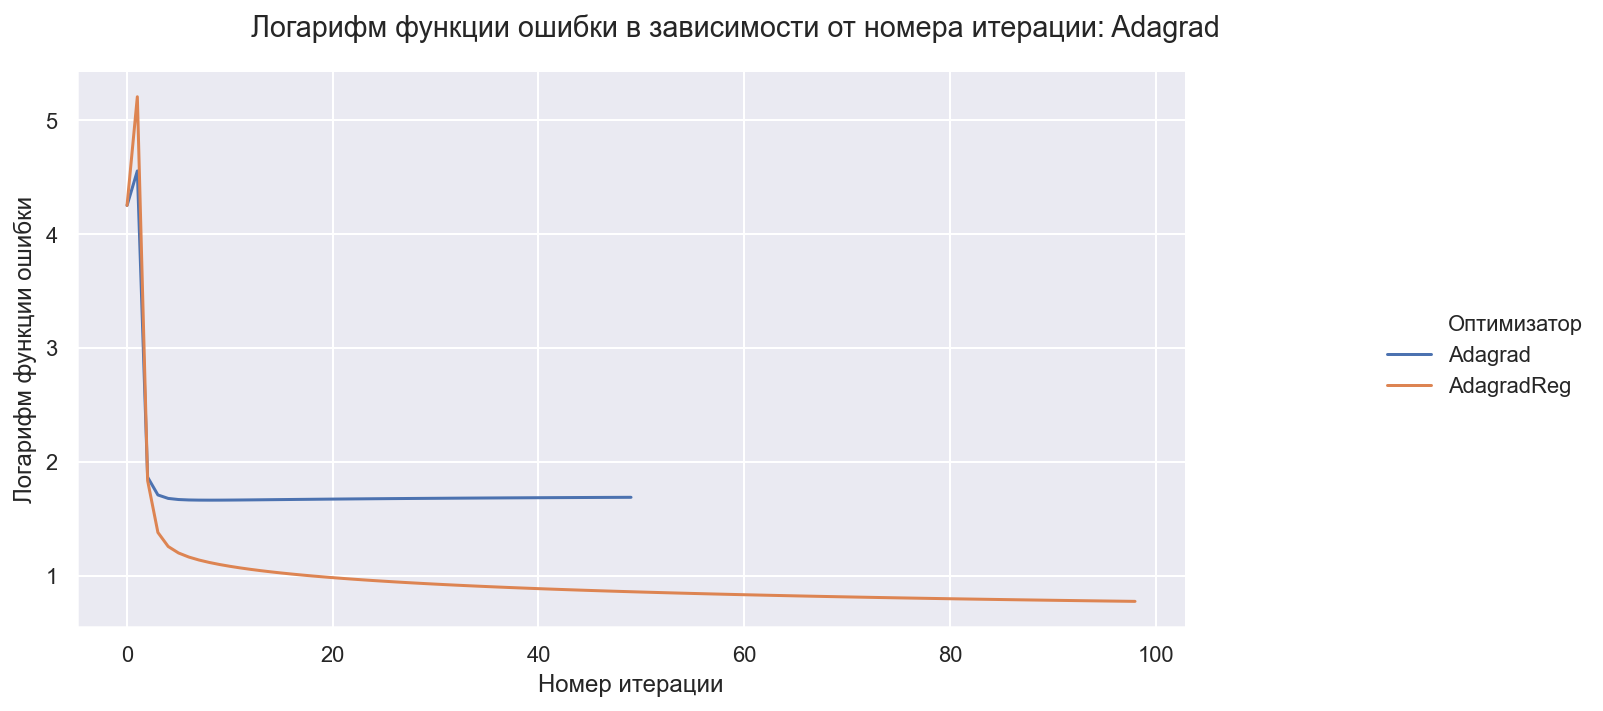

In [56]:
fig = sns.relplot(x='Номер итерации', y='Логарифм функции ошибки', hue='Оптимизатор',
                  data=graph, kind='line', legend='full')
plt.subplots_adjust(top=0.9)
fig.fig.set_size_inches(12, 5)
fig.fig.suptitle('Логарифм функции ошибки в зависимости от номера итерации: Adagrad');

<div class="alert alert-block alert-info">
Как ванильный гд так и гд с импульсом не улучшаются (количество шагов одно и то же), при этом значение ошибки становится больше, поскольку мы учитываем еще и норму весов.<br>
    
Адаград с регуляризацией ведет себя сильно хуже в смысле количества шагов, но позволяет подойти к минимуму ближе, поскольку ограничение на размер веса не дает learning rate "затухнуть".<br>
    
В целом, как мне кажется, ограничение регуляризации не дает стохастическому спуску сильно отклониться от оптимальной траектории и где то застрять, но с другой стороны сильно замедляет сам спуск.
</div>

## Задание 8. Бонус — Реализация метода SAG (2 балла)

В качестве бонуса вам будет следующее задание - напишите собственную реализацию стохастического градиентного спуска по методу SAG в файле `utils.py`. Подробнее прочитать про SAG можно [здесь](https://arxiv.org/pdf/1309.2388.pdf).

$$w_{k + 1} = w_k - \alpha_k{1\over{l}}\sum\limits_{i = 1}^l \nabla_w q_i(w_k)$$

$$q_i(w_k) = \begin{cases} \nabla_w q_i(w_k), & i = i_k \\ \nabla_w q_i(w_{k - 1}), & \mbox{otherwise} \end{cases}$$

Сравните свою реализацию метода SAG с обычным полным градиентным спуском на наших данных. Проведите сравнение аналогично заданию 5. Что вы можете сказать про сходимость этого метода?

In [33]:
%autoreload 2

from utils import LinearRegression

In [34]:
regression = LinearRegression(lambda_=lambda_, solver='StochasticAverageGradient')
pipeline = Pipeline(steps=[('ohe_scaling', column_transformer), ('regression', regression)])
searcher = GridSearchCV(pipeline, {'regression__lambda_': np.logspace(-2, 0.5, 20)},
                        scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
searcher.fit(X_train, y_train)

y_pred = searcher.best_estimator_.predict(X_test)
y_train_pred = searcher.best_estimator_.predict(X_train)

loss['StochasticAverageGradient'] = searcher.best_estimator_['regression'].loss_history
result['StochasticAverageGradient'] = [searcher.best_params_['regression__lambda_'],
                                       mean_squared_error(y_test, y_pred),
                                       mean_squared_error(y_train, y_train_pred),
                                       r2_score(y_test, y_pred),
                                       r2_score(y_train, y_train_pred)]

In [35]:
pd.DataFrame(result, index=['lambda', 'Test MSE', 'Train MSE', 'Test R2', 'Train R2'])

,GradientDescent,StochasticDescent,MomentumDescent,Adagrad,StochasticAverageGradient
lambda,3.162278,0.175222,3.162278,2.571914,3.162278
Test MSE,0.454225,6.743664,0.455531,0.392989,4.371164
Train MSE,0.464222,6.762498,0.465475,0.405858,4.406551
Test R2,0.665489,-3.966330,0.664527,0.710585,-2.219117
Train R2,0.661165,-3.935940,0.660250,0.703764,-2.216338


In [36]:
loss_history = dict([(k, pd.Series(v)) for k, v in loss.items() if k in ('GradientDescent', 'StochasticAverageGradient')])
loss_history = pd.DataFrame(loss_history).reset_index().rename(columns={'index': 'Номер итерации'})
graph = pd.melt(loss_history, id_vars='Номер итерации', var_name='Оптимизатор', value_name='Функция ошибки')
graph['Логарифм функции ошибки'] = np.log1p(graph['Функция ошибки'])

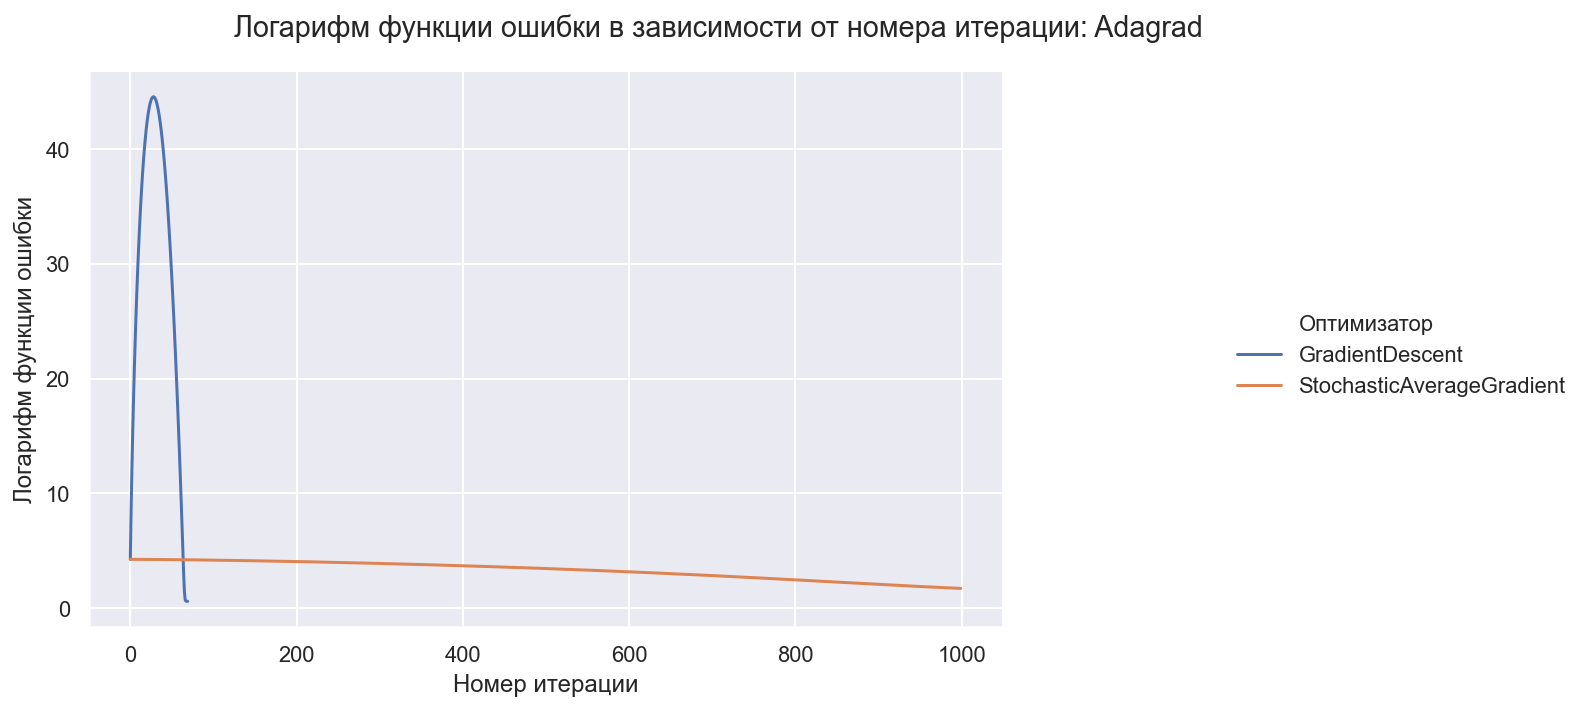

In [37]:
fig = sns.relplot(x='Номер итерации', y='Логарифм функции ошибки', hue='Оптимизатор',
                  data=graph, kind='line', legend='full')
plt.subplots_adjust(top=0.9)
fig.fig.set_size_inches(12, 5)
fig.fig.suptitle('Логарифм функции ошибки в зависимости от номера итерации: Adagrad');

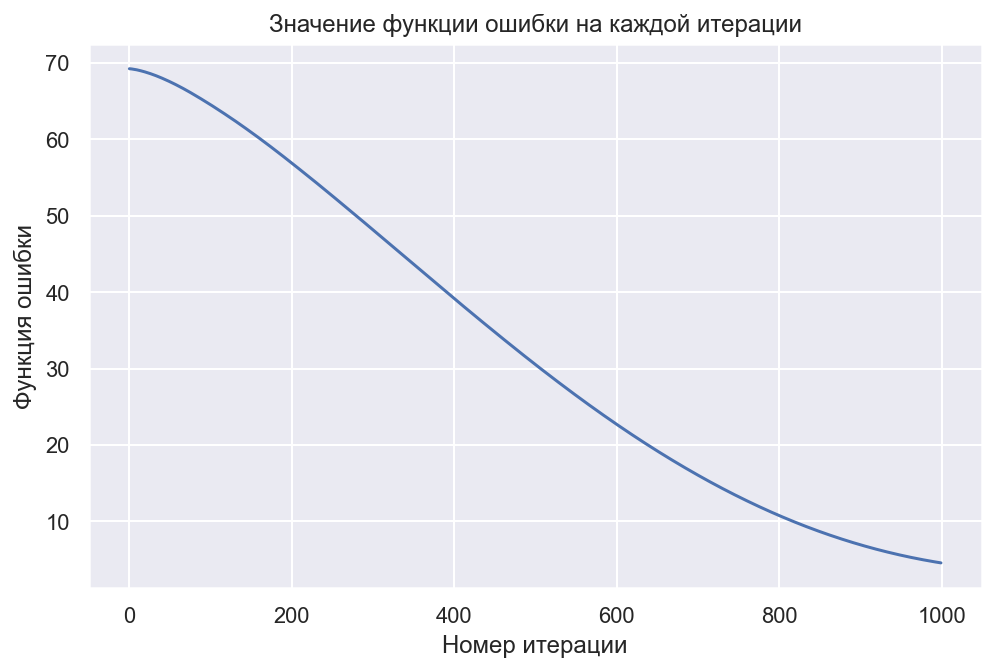

In [39]:
plt.plot(loss['StochasticAverageGradient'])
plt.title('Значение функции ошибки на каждой итерации')
plt.xlabel('Номер итерации')
plt.ylabel('Функция ошибки');

<div class="alert alert-block alert-info">
Если посмотреть на содержимое <b>loss_history</b>, видно, как ошибка уменьшается с 69 до 3, а затем снова начинает расти, но мы упираемся в потолок итераций. И идем довольно медленно. Я пробовала сетку <b>np.logspace(-2, 2, 20)</b>, оптимальный параметр $\lambda \approx{20}$, но ситуацию это не улучшило.<br>
    
Как видно в таблице, <b>SAG</b> лучше <b>SGD</b>, но не лучше классического спуска. Тут, вероятнее всего, нужно все-таки выстрадать learning rate поумнее.
</div>

Вставьте картинку или видео, описывающие ваш опыт выполнения этого задания.

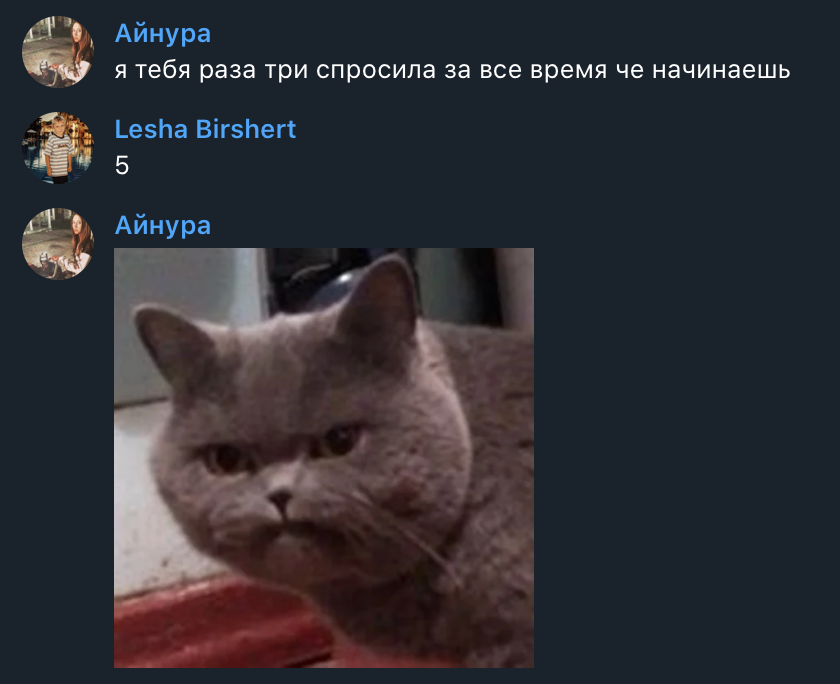